In [1]:
import numpy as np

In [3]:
?np.random.randn

In [58]:
import time
def timer(func):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    computation_time = end_time - start_time
    print(f"Executation time of {func.__name__}: {computation_time} seconds")
    return result
  return wrapper

In [70]:
true_b = 1
true_w = 2
N = 100 # number of data

np.random.seed(42)
x = np.random.rand(N,1)
epsilon = 0.1 * np.random.randn(N,1)
y = true_b + true_w * x + epsilon # data generation

In [71]:
# Shuffles the indices
idx = np.arange(N)
split_index = int(N * 0.8)

train_idx = idx[:split_index]
val_idx = idx[split_index:]

# Generates train data and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

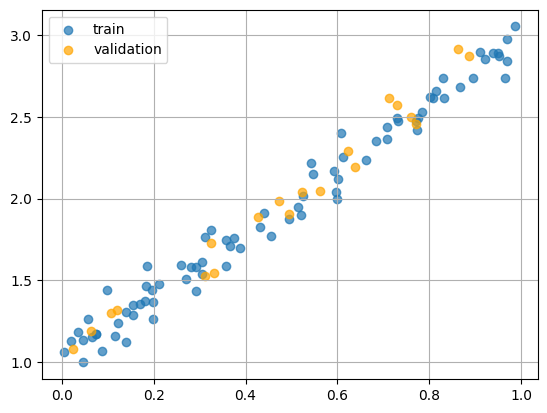

In [72]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, alpha=0.7, label='train')
plt.scatter(x_val, y_val, color='orange', alpha=0.7, label='validation')
plt.legend()
plt.grid()

In [73]:
@timer
def train_model_numpy(lr=0.1, epochs=1000):

  # Initialize parameters
  b = np.random.randn(1)
  w = np.random.randn(1)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train
    error = (y_hat - y_train)
    mse_loss = np.mean(error ** 2)

    # Gradient computation
    b_grad = 2 * np.mean(error)
    w_grad = 2 * np.mean(x_train * error)
    b = b - lr * b_grad
    w = w - lr * w_grad

    if epoch % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch, mse_loss))

  return b, w

In [74]:
b_hat, w_hat = train_model_numpy()
print("b_estimate:{}, w_estimate:{}".format(b_hat, w_hat))

epoch: 0, loss: 1.5558947253513733
epoch: 50, loss: 0.007732399680758532
epoch: 100, loss: 0.007725710369168937
epoch: 150, loss: 0.007724227012488814
epoch: 200, loss: 0.007723898077701266
epoch: 250, loss: 0.007723825136313728
epoch: 300, loss: 0.00772380896153922
epoch: 350, loss: 0.007723805374778131
epoch: 400, loss: 0.007723804579412791
epoch: 450, loss: 0.007723804403040288
epoch: 500, loss: 0.0077238043639296355
epoch: 550, loss: 0.007723804355256836
epoch: 600, loss: 0.007723804353333638
epoch: 650, loss: 0.007723804352907168
epoch: 700, loss: 0.007723804352812602
epoch: 750, loss: 0.007723804352791627
epoch: 800, loss: 0.007723804352786976
epoch: 850, loss: 0.007723804352785943
epoch: 900, loss: 0.007723804352785721
epoch: 950, loss: 0.007723804352785674
Executation time of train_model_numpy: 0.03809762001037598 seconds
b_estimate:[1.02341376], w_estimate:[1.93680725]


In [79]:
import torch

# create tensor at CPU
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

# create tensor at GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)

In [91]:
@timer
def train_model_torch_(lr=0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    error = (y_hat - y_train_tensor)
    mse_loss = torch.mean(error ** 2)
    # Gradient Computation and descent
    mse_loss.backward()
    with torch.no_grad():
      b -= lr * b.grad
      w -= lr * w.grad
    b.grad.zero_()
    w.grad.zero_()

    if epoch % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch, mse_loss))
  return b, w

In [92]:
b_hat, w_hat = train_model_torch_()
print("b_estimate:{}, w_estimate:{}".format(b_hat, w_hat))

epoch: 0, loss: 2.081305540655837
epoch: 50, loss: 0.010442169778164685
epoch: 100, loss: 0.008326602917929693
epoch: 150, loss: 0.007857476444320019
epoch: 200, loss: 0.0077534466446551485
epoch: 250, loss: 0.007730377234509783
epoch: 300, loss: 0.007725261724730715
epoch: 350, loss: 0.0077241274549396275
epoch: 400, loss: 0.007723876040137949
epoch: 450, loss: 0.007723820235948276
epoch: 500, loss: 0.007723807881663119
epoch: 550, loss: 0.007723805136487023
epoch: 600, loss: 0.007723804528193519
epoch: 650, loss: 0.007723804392756275
epoch: 700, loss: 0.007723804362049461
epoch: 750, loss: 0.007723804354615012
epoch: 800, loss: 0.007723804354615012
epoch: 850, loss: 0.007723804354615012
epoch: 900, loss: 0.007723804354615012
epoch: 950, loss: 0.007723804354615012
Executation time of train_model_torch_: 0.161238431930542 seconds
b_estimate:tensor([1.0234], requires_grad=True), w_estimate:tensor([1.9368], requires_grad=True)


In [89]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=88127fee697c7a1f26f5ed25c5b8eedf1c0ceb81025f05bbc139b87071c62df5
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


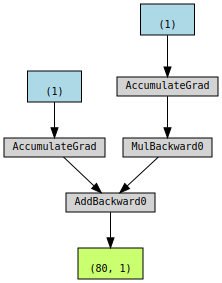

In [107]:
from torchviz import make_dot
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
y_hat = b + w * x_train_tensor
make_dot(y_hat)

In [141]:
import torch.optim as optim
import torch.nn as nn
@timer
def train_model_torch(lr=0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  parameters = [b, w]
  optimizer = optim.SGD(parameters, lr=lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    loss = mse_loss(y_hat, y_train_tensor)
    # Gradient Computation and descent
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch, loss))
  return b, w

In [112]:
b_hat, w_hat = train_model_torch()
print("b_estimate:{}, w_estimate:{}".format(b_hat, w_hat))

epoch: 0, loss: 0.4012533158754329
epoch: 50, loss: 0.029627638988592865
epoch: 100, loss: 0.012580975476576703
epoch: 150, loss: 0.008800889639398507
epoch: 200, loss: 0.00796264683762957
epoch: 250, loss: 0.007776766567908213
epoch: 300, loss: 0.0077355480894485944
epoch: 350, loss: 0.007726408303772424
epoch: 400, loss: 0.007724381657675169
epoch: 450, loss: 0.007723932395803293
epoch: 500, loss: 0.0077238327389754086
epoch: 550, loss: 0.007723810647448275
epoch: 600, loss: 0.0077238057530565184
epoch: 650, loss: 0.007723804667609866
epoch: 700, loss: 0.007723804423353265
epoch: 750, loss: 0.007723804368786134
epoch: 800, loss: 0.007723804356563129
epoch: 850, loss: 0.007723804354563772
epoch: 900, loss: 0.007723804354563772
epoch: 950, loss: 0.007723804354563772
Executation time of train_model_torch: 0.21133208274841309 seconds
b_estimate:tensor([1.0234], requires_grad=True), w_estimate:tensor([1.9368], requires_grad=True)


In [154]:
import torch.optim as optim
import torch.nn as nn
@timer
def train_model_torch2(lr=0.01, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w2 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  parameters = [b, w, w2]
  optimizer = optim.SGD(parameters, lr=lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor + w2 * (x_train_tensor ** 2 )
    loss = mse_loss(y_hat, y_train_tensor)
    # Gradient Computation and descent
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch, loss))
  return b, w, w2

In [110]:
b_hat, w_hat, w2_hat = train_model_torch2()
print("b_estimate:{}, w_estimate:{}, w2_estimate:{}".format(b_hat, w_hat, w2_hat))

epoch: 0, loss: 0.8587775577325862
epoch: 50, loss: 0.0664451367821873
epoch: 100, loss: 0.01915843786132932
epoch: 150, loss: 0.015847931427406075
epoch: 200, loss: 0.015239625495082404
epoch: 250, loss: 0.014817565653610665
epoch: 300, loss: 0.01442731144940752
epoch: 350, loss: 0.014058367820700782
epoch: 400, loss: 0.013709065763205793
epoch: 450, loss: 0.013378322423996461
epoch: 500, loss: 0.013065155396421824
epoch: 550, loss: 0.012768630988912838
epoch: 600, loss: 0.012487864768747869
epoch: 650, loss: 0.012222018496764991
epoch: 700, loss: 0.011970300168925134
epoch: 750, loss: 0.01173195831655005
epoch: 800, loss: 0.011506279147776147
epoch: 850, loss: 0.011292597005069665
epoch: 900, loss: 0.011090268340926962
epoch: 950, loss: 0.010898690238387151
Executation time of train_model_torch2: 0.2511928081512451 seconds
b_estimate:tensor([0.9287], requires_grad=True), w_estimate:tensor([2.5039], requires_grad=True), w2_estimate:tensor([-0.5491], requires_grad=True)


## Quiz 1

In [126]:
x_val_tensor = torch.as_tensor(x_val).to(device)
y_val_tensor = torch.as_tensor(y_val).to(device)
y_val_pred = b_hat + w_hat * x_val_tensor
mse_loss = nn.MSELoss()
loss = mse_loss(y_val_pred, y_val_tensor)
loss

tensor(0.0098, dtype=torch.float64, grad_fn=<MseLossBackward0>)

## Quiz 2

In [142]:
import pickle

with open('quiz_data.pkl', 'rb') as f:
	data = pickle.load(f)

In [131]:
len(data['x'])

100

In [183]:
# Shuffles the indices
idx = np.arange(len(data['x']))
split_index = int(len(data['x']) * 0.8)

train_idx = idx[:split_index]
val_idx = idx[split_index:]

# Generates train data and validation sets
x_train, y_train = data['x'][train_idx], data['y'][train_idx]
x_val, y_val = data['x'][val_idx], data['y'][val_idx]

# create tensor at GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)

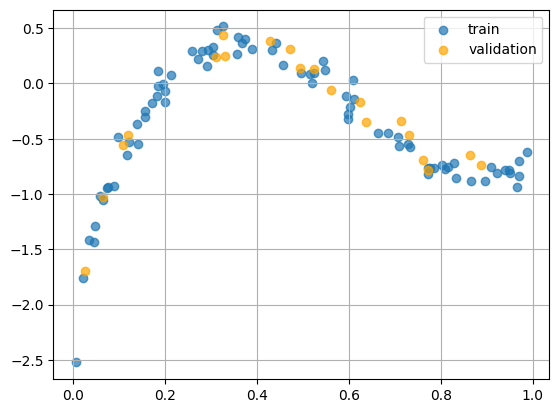

In [184]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, alpha=0.7, label='train')
plt.scatter(x_val, y_val, color='orange', alpha=0.7, label='validation')
plt.legend()
plt.grid()

In [206]:
import torch.optim as optim
import torch.nn as nn
@timer
def train_model_torch3(lr=0.01, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w2 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w3 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  parameters = [b, w, w2, w3]
  optimizer = optim.SGD(parameters, lr=lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor + w2 * (x_train_tensor ** 2 ) + w3 * (x_train_tensor ** 3)
    loss = mse_loss(y_hat, y_train_tensor)
    # Gradient Computation and descent
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch, loss))
  return b, w, w2, w3

In [207]:
b_hat, w_hat, w2_hat, w3_hat = train_model_torch3()
print("b_estimate:{}, w_estimate:{}, w2_estimate:{}, w3_estimate:{}".format(b_hat, w_hat, w2_hat, w3_hat))

epoch: 0, loss: 1.5970473677530181
epoch: 50, loss: 0.36049143865311556
epoch: 100, loss: 0.28708528197829436
epoch: 150, loss: 0.2776089414001503
epoch: 200, loss: 0.2729195262570136
epoch: 250, loss: 0.2694377645592634
epoch: 300, loss: 0.26667772254306693
epoch: 350, loss: 0.2644112739376271
epoch: 400, loss: 0.26248762399255926
epoch: 450, loss: 0.2608037033790399
epoch: 500, loss: 0.25928884180405654
epoch: 550, loss: 0.257894564897326
epoch: 600, loss: 0.25658765089676133
epoch: 650, loss: 0.2553452495971112
epoch: 700, loss: 0.2541516268549933
epoch: 750, loss: 0.25299596190600854
epoch: 800, loss: 0.2518708074920461
epoch: 850, loss: 0.25077095721943266
epoch: 900, loss: 0.24969279609324105
epoch: 950, loss: 0.24863380739667634
Executation time of train_model_torch3: 0.6305093765258789 seconds
b_estimate:tensor([-0.3979], requires_grad=True), w_estimate:tensor([0.3416], requires_grad=True), w2_estimate:tensor([0.9508], requires_grad=True), w3_estimate:tensor([-1.8528], requires

In [208]:
x_val_tensor = torch.as_tensor(x_val).to(device)
y_val_tensor = torch.as_tensor(y_val).to(device)
y_val_pred = b_hat + w_hat * x_val_tensor + w2_hat * (x_val_tensor ** 2 )  + w3_hat * (x_val_tensor ** 3)
mse_loss = nn.MSELoss()
loss = mse_loss(y_val_pred, y_val_tensor)
loss

tensor(0.2172, dtype=torch.float64, grad_fn=<MseLossBackward0>)

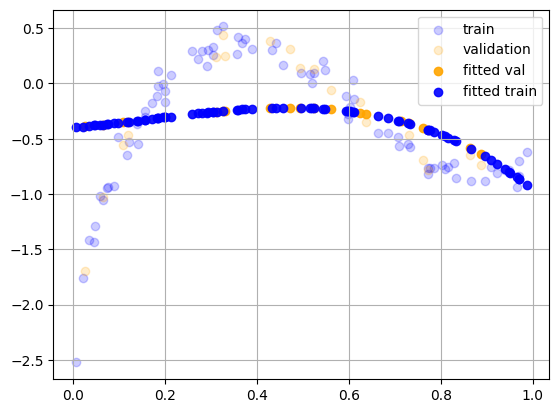

In [210]:
import matplotlib.pyplot as plt
y_train_pred = b_hat + w_hat * x_train_tensor + w2_hat * (x_train_tensor ** 2 )  + w3_hat * (x_train_tensor ** 3)
plt.scatter(x_train, y_train, alpha=0.2, label='train',color='b')
plt.scatter(x_val, y_val, color='orange', alpha=0.2, label='validation')
plt.scatter(x_val, y_val_pred.tolist(), color='orange', alpha=0.9, label='fitted val')
plt.scatter(x_train, y_train_pred.tolist(), alpha=0.9, label='fitted train',color='b')
plt.legend()
plt.grid()